In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def latt_generator(L,p):
    lattice = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            rand = np.random.random()

            if rand<p :
                lattice[i,j]=1
                
    return lattice

In [3]:
def infinite_cluster_finder(lattice):
    
    temp_L = L+2
    temp_lattice = np.zeros((temp_L, temp_L))
    temp_lattice[0,:] = temp_lattice[-1,:] = 0
    temp_lattice[:,0] = 1
    temp_lattice[:,-1] = 1
    temp_lattice[1:-1,1:-1] = lattice
    
    
    color_lattice = np.zeros(temp_lattice.shape)
    color_lattice[:,0]=1
    color_lattice[:,-1]=-1
    
    
    color=2
    for j in range(1,temp_L):
        for i in range(1,temp_L-1):
            if temp_lattice[i,j]==1:
                if temp_lattice[i-1,j] == temp_lattice[i,j-1]==1:
                    color_lattice[i,j]= color_lattice[i,j-1]
                    color_lattice[color_lattice==color_lattice[i-1,j]]=color_lattice[i,j]

                elif temp_lattice[i-1,j]==1:
                    color_lattice[i,j] = color_lattice[i-1,j]

                elif temp_lattice[i,j-1]==1:
                    color_lattice[i,j] = color_lattice[i,j-1]

                else:
                    color_lattice[i,j]=color
                    color+=1
            else:
                color+=1
                
     
    if color_lattice[0,0] in color_lattice[:,-1]:
        state = 1
    else:
        state=0

    return state, color_lattice

In [4]:
def clusters_displayer(color_lattice):
    color_lattice[color_lattice==0]=color_lattice.max()*3
    plt.imshow(color_lattice[1:-1,1:-1],cmap=plt.get_cmap('tab20'))

there is 0 infinite clusters


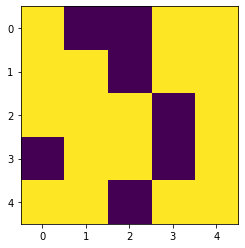

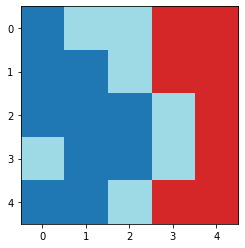

In [9]:
L = 5
p = 0.6

lattice = latt_generator(L,p)
plt.imshow(lattice)

state, color_lattice= infinite_cluster_finder(lattice)
print('there is {} infinite clusters'.format(state))

plt.figure()
clusters_displayer(color_lattice)



In [47]:
P = [i for i in np.arange(0.55,0.65,0.01)]
average_data =[]
Q = 30
L=150
iterr=0
for p in P:
    print(p)
    average = 0
    for q in range(Q):
        
        state , trash = infinite_cluster_finder(latt_generator(L,p))
        average += state
        
    average /= Q
    average_data.append(average)
    

0.55
0.56
0.5700000000000001
0.5800000000000001
0.5900000000000001
0.6000000000000001
0.6100000000000001
0.6200000000000001
0.6300000000000001
0.6400000000000001


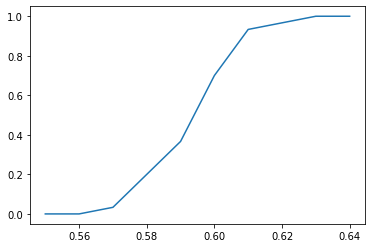

In [48]:
plt.plot(P,average_data)

# Hoshen Kopelman

In [53]:
L=10
p=0.3
lattice = latt_generator(L,p)

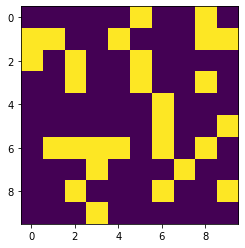

In [54]:
plt.imshow(lattice)

In [55]:
temp_L = L+2
temp_lattice = np.zeros((temp_L,temp_L))
temp_lattice[:,0]=1
temp_lattice[:,-1]=0
temp_lattice[1:-1,1:-1]= lattice

In [62]:
color_lattice = np.zeros(temp_lattice.shape)
color_lattice[:,0]=1
color_lattice[:,-1]=-2
color_lattice

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.]])

In [64]:
temp_lattice

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
cluster_color=[0 for i in range(1000)]
cluster_size=[0 for i in range(1000)]
k=1
for j in range(1,temp_L):
    for i in range(1,temp_L-1):
        if temp_lattice[i-1,j]== temp_lattice[i,j-1]==1:
            cluster_color[k]=k
            s[k]+=1
            k+=1
        elif temp_lattice[i-1,j]==1:
            cluster_color[]